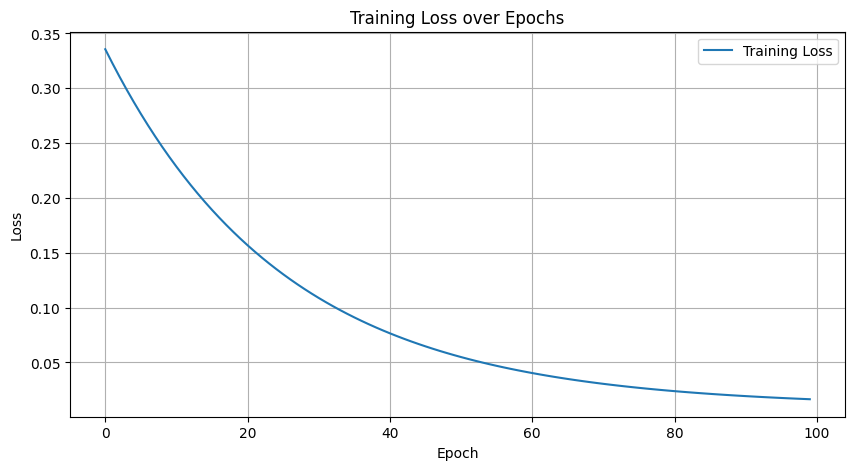

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Generate synthetic data for demonstration
np.random.seed(42)
X = np.linspace(-1, 1, 200)
y = 0.5 * X + np.random.normal(0, 0.1, X.shape)

# Define a simple linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Lists to store losses and iterations
losses = []
iterations = []

# Custom training loop to update plot during training
def train_model(epochs):
    for epoch in range(epochs):
        history = model.fit(X, y, epochs=1, verbose=0)
        losses.append(history.history['loss'][0])
        iterations.append(epoch)
        
        # Update plot dynamically
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(iterations, losses, label='Training Loss')
        plt.scatter(iterations[-1], losses[-1], color='red')  # Highlight the latest point
        # Annotate directly above the last point
        annotation_x_pos = iterations[-1]
        annotation_y_pos = losses[-1] + (plt.ylim()[1] - plt.ylim()[0]) * 0.02  # Slightly above the last point, adjusted by 2% of the y-axis range

        plt.text(annotation_x_pos, annotation_y_pos, f'{losses[-1]:.4f}',
                 color='red', ha='center')  # Annotate the latest loss value
        plt.legend()
        plt.grid(True)
        plt.show()

# Run the training function for a number of epochs
train_model(100)


In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-1, 1, 200).reshape(-1, 1).astype(np.float32)  # Ensure X is float32
y = 0.5 * X + np.random.normal(0, 0.1, X.shape).astype(np.float32)  # Ensure y is float32

# Manually define the weight and bias with the correct data type (float32)
W = tf.Variable(np.random.randn(1, 1).astype(np.float32), dtype=tf.float32)
b = tf.Variable(np.random.randn(1).astype(np.float32), dtype=tf.float32)

# Learning rate
learning_rate = 0.01

# Training loop
losses = []
for epoch in range(100):
    with tf.GradientTape() as tape:
        # Forward pass: compute the predictions and loss
        y_pred = tf.matmul(X, W) + b
        loss = tf.reduce_mean(tf.square(y - y_pred))
    
    # Backward pass: compute the gradient of the loss with respect to W and b
    gradients = tape.gradient(loss, [W, b])
    
    # Update W and b
    W.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])
    
    # Store the loss value for plotting
    losses.append(loss.numpy())

    # Update the plot
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(losses, label='Training Loss')
    plt.scatter(iterations[-1], losses[-1], color='red')  # Highlight the latest point
    # Annotate directly above the last point
    annotation_x_pos = iterations[-1]
    annotation_y_pos = losses[-1] + (plt.ylim()[1] - plt.ylim()[0]) * 0.02  # Slightly above the last point, adjusted by 2% of the y-axis range

    plt.text(annotation_x_pos, annotation_y_pos, f'{losses[-1]:.4f}',
                color='red', ha='center')  # Annotate the latest loss value
    plt.legend()
    plt.grid(True)
    plt.show()


IndentationError: unexpected indent (3875046510.py, line 45)